### Teste enda enklere kode enn kristines :))) Nemmlig min egen


##### Initializing

In [14]:
#importerer bibliotek
import os 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input

In [15]:
import pandas as pd
import os 
#import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##### Data fromating

In [17]:

print(os.getcwd())

# Load your dataset
data = pd.read_csv('..\\rrsalltest0.txt', index_col = False)  # Replace with your dataset path
#data = pd.read_csv('..\\..\\..\\Documents\\AM_prosjekt\\rrsalltest0.txt', low_memory = False)  # Replace with your dataset path

# Assume 'features' are the columns used for prediction and 'target' is the algae concentration
X = [] #features
for i in range(60):
    value = 402.5+5*i
    X.append(str(value) + '_nm')

#y = data[' max_diatom_c']  # Target variable
#y = data[' max_flag_c']  # Target variable
y = data[' max_cdom_conc']  # Target variable

print(X)
reflectance_spectrum = data.values[:,0: -3]
reflectance_spectrum = np.asarray(reflectance_spectrum).astype('float32')
#reflectance_spectrum = data[:,0: -3]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reflectance_spectrum, y, test_size=0.2, random_state=42)

C:\Users\amhs0\OneDrive\Documents\NTNU\9 sem\prosjketoppgave\Kode


C:\Users\amhs0\AppData\Local\Temp\ipykernel_26264\4166345720.py:4: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('..\\rrsalltest0.txt', index_col = False)  # Replace with your dataset path
C:\Users\amhs0\AppData\Local\Temp\ipykernel_26264\4166345720.py:4: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv('..\\rrsalltest0.txt', index_col = False)  # Replace with your dataset path


['402.5_nm', '407.5_nm', '412.5_nm', '417.5_nm', '422.5_nm', '427.5_nm', '432.5_nm', '437.5_nm', '442.5_nm', '447.5_nm', '452.5_nm', '457.5_nm', '462.5_nm', '467.5_nm', '472.5_nm', '477.5_nm', '482.5_nm', '487.5_nm', '492.5_nm', '497.5_nm', '502.5_nm', '507.5_nm', '512.5_nm', '517.5_nm', '522.5_nm', '527.5_nm', '532.5_nm', '537.5_nm', '542.5_nm', '547.5_nm', '552.5_nm', '557.5_nm', '562.5_nm', '567.5_nm', '572.5_nm', '577.5_nm', '582.5_nm', '587.5_nm', '592.5_nm', '597.5_nm', '602.5_nm', '607.5_nm', '612.5_nm', '617.5_nm', '622.5_nm', '627.5_nm', '632.5_nm', '637.5_nm', '642.5_nm', '647.5_nm', '652.5_nm', '657.5_nm', '662.5_nm', '667.5_nm', '672.5_nm', '677.5_nm', '682.5_nm', '687.5_nm', '692.5_nm', '697.5_nm']


##### Making and training model

In [19]:
# Create a linear regression model
model = Sequential([ #linear model
    Input(shape=(60,)),
    Dense(10, activation = 'sigmoid'), #10 dens layers activated by sigmoid
    Dense(1, activation = 'linear')
])
#model = LinearRegression()

#model.compile(loss='binary_crossentropy', optimizer='sgd')
model.compile(optimizer=Adam(), loss='mse')

# Train the model
#model.fit(X_train, y_train)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True) # early stopping if no imporovment after atccience = 10 epochs / iterations

model_fitted = model.fit(
    x = X_train,
    y = y_train,
    epochs = 300, #antall iterasjoner. Kristine kjører otginalt med 100 
    verbose = 2,
    callbacks = [early_stopping],
    validation_split = 0.2
)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Epoch 1/300
6667/6667 - 7s - 983us/step - loss: 1.2252 - val_loss: 1.1983
Epoch 2/300
6667/6667 - 6s - 923us/step - loss: 1.1774 - val_loss: 1.1846
Epoch 3/300
6667/6667 - 6s - 923us/step - loss: 1.1648 - val_loss: 1.1735
Epoch 4/300
6667/6667 - 6s - 923us/step - loss: 1.1534 - val_loss: 1.1623
Epoch 5/300
6667/6667 - 6s - 899us/step - loss: 1.1429 - val_loss: 1.1528
Epoch 6/300
6667/6667 - 6s - 912us/step - loss: 1.1333 - val_loss: 1.1438
Epoch 7/300
6667/6667 - 6s - 916us/step - loss: 1.1246 - val_loss: 1.1351
Epoch 8/300
6667/6667 - 6s - 883us/step - loss: 1.1168 - val_loss: 1.1311
Epoch 9/300
6667/6667 - 6s - 897us/step - loss: 1.1106 - val_loss: 1.1219
Epoch 10/300
6667/6667 - 6s - 889us/step - loss: 1.1055 - val_loss: 1.1183
Epoch 11/300
6667/6667 - 6s - 907us/step - loss: 1.1016 - val_loss: 1.1152
Epoch 12/300
6667/6667 - 6s - 902us/step - loss: 1.0986 - val_loss: 1.1092
Epoch 13/300
6667/6667 - 6s - 877us/step - loss: 1.0963 - val_loss: 1.1083
Epoch 14/300
6667/6667 - 6s - 925u

##### plotting

C:\Users\amhs0\OneDrive\Documents\NTNU\9 sem\prosjketoppgave\Kode
Mean Squared Error: 0.8006665415351586
R-squared: 0.3973829073414237


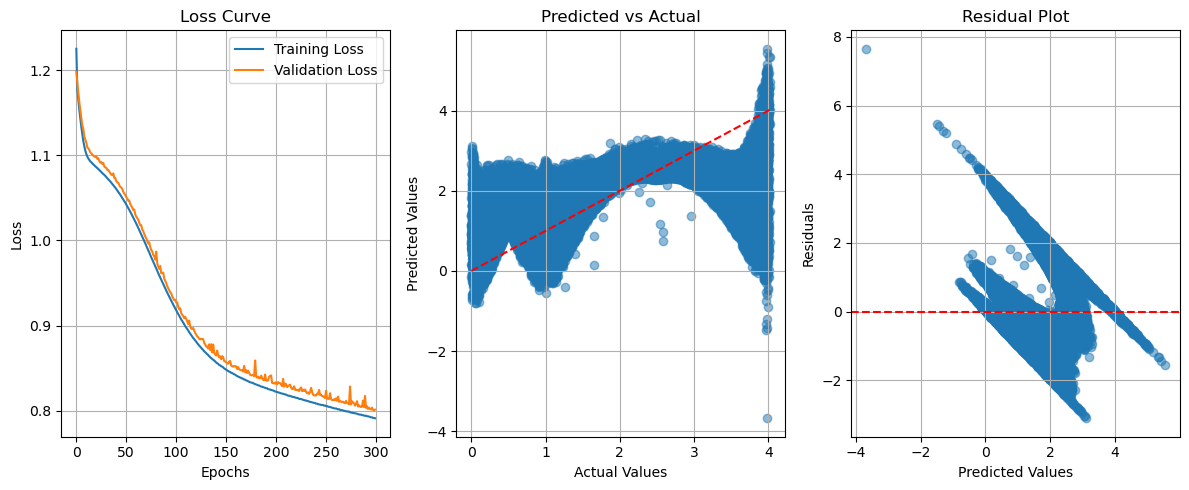

In [27]:
import matplotlib.pyplot as plt
import numpy as np

print(os.getcwd())

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Assuming model_fitted contains the training history
history = model_fitted.history

# Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Predicted vs Actual Values
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()

# Flatten y_pred to ensure it is 1D
y_pred = y_pred.flatten()

# Residual Plot
plt.subplot(1, 3, 3)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

#save to comp
#plt.savefig('Plots\\Enkel_test\\triple_plot_pref_1000epochs.svg') #scalable vector graphics 
plt.savefig('Plots\\Kristines_kode_300e_cdom.png') #scalable vector graphics 

plt.tight_layout()
plt.show()